## Mechanical properties prediction of low alloy steels based on their material compositions by weight percentages  

###### Dataset: https://www.kaggle.com/rohannemade/mechanical-properties-of-low-alloy-steels

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data=pd.read_csv("MatNavi Mechanical properties of low-alloy steels.csv")
data.head().T

,0,1,2,3,4
Alloy code,MBB,MBB,MBB,MBB,MBB
C,0.12,0.12,0.12,0.12,0.12
Si,0.36,0.36,0.36,0.36,0.36
Mn,0.52,0.52,0.52,0.52,0.52
P,0.009,0.009,0.009,0.009,0.009
S,0.003,0.003,0.003,0.003,0.003
Ni,0.089,0.089,0.089,0.089,0.089
Cr,0.97,0.97,0.97,0.97,0.97
Mo,0.61,0.61,0.61,0.61,0.61
Cu,0.04,0.04,0.04,0.04,0.04


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [99]:
data.isnull().sum()

Alloy code                  0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (°C)           0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

In [100]:
import quick_eda
from quick_eda.df_eda import df_eda

df_eda(data)

Head of dataframe:

  Alloy code     C    Si    Mn      P      S     Ni    Cr    Mo    Cu    V  \
0        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
1        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
2        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
3        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
4        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   

      Al       N  Ceq  Nb + Ta   Temperature (°C)   0.2% Proof Stress (MPa)  \
0  0.003  0.0066  0.0      0.0                 27                       342   
1  0.003  0.0066  0.0      0.0                100                       338   
2  0.003  0.0066  0.0      0.0                200                       337   
3  0.003  0.0066  0.0      0.0                300                       346   
4  0.003  0.0066  0.0      0.0                400                       316   

    Tensile Strength (MPa)   Elongat

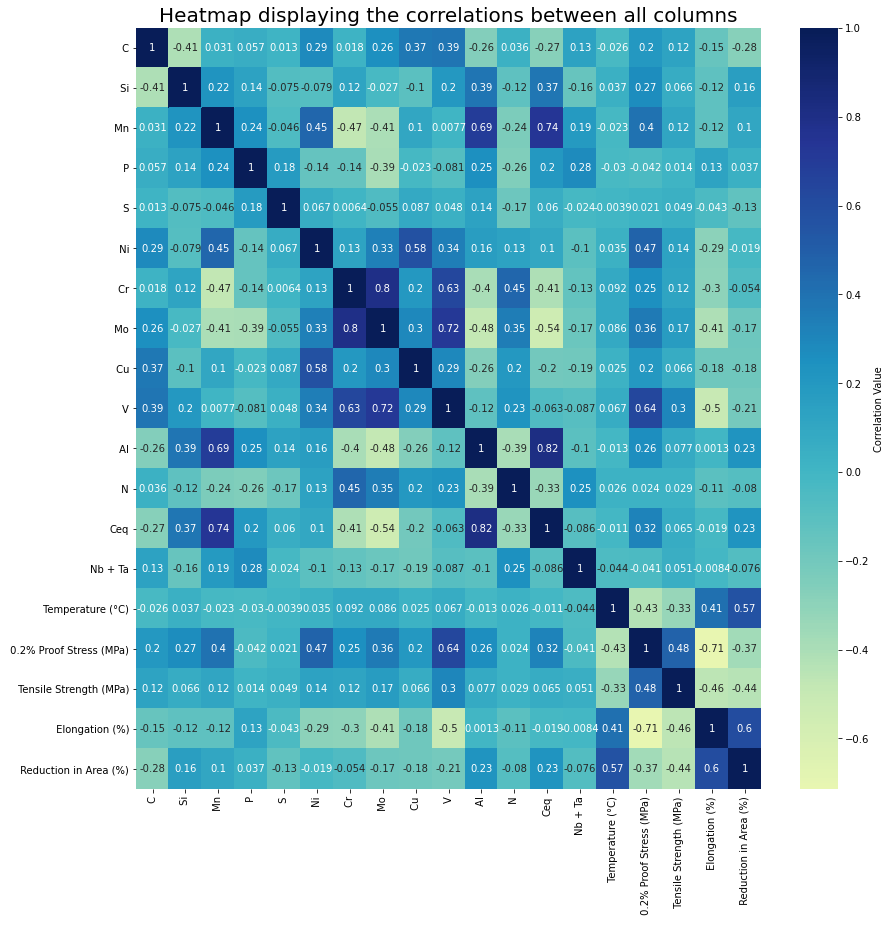

In [101]:
corr = data.corr()

plt.figure(figsize=(14,14))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(corr, center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

1. 0.2% Proof Stress is highly influenced by weight percentage of V(0.64), Ni(0.47), Mn(0.4), Mo(0.36)
2. Tensile Strenght is highly influenced by weight percentage of V(0.30)
3. Elongation inversedly influenced by weight percentage of V(-0.5), Mo(-0.41), Cr(-0.3), Ni(-0.29)
4. Reduction in Area is significantly influenced by weight percentage of AI(0.23) Ceq(0.23, C(-0.28)

### Data Preparation For Machine Learning

In [102]:
data = data.drop(columns='Alloy code')
data.head().T

,0,1,2,3,4
C,0.1200,0.1200,0.1200,0.1200,0.1200
Si,0.3600,0.3600,0.3600,0.3600,0.3600
Mn,0.5200,0.5200,0.5200,0.5200,0.5200
P,0.0090,0.0090,0.0090,0.0090,0.0090
S,0.0030,0.0030,0.0030,0.0030,0.0030
Ni,0.0890,0.0890,0.0890,0.0890,0.0890
Cr,0.9700,0.9700,0.9700,0.9700,0.9700
Mo,0.6100,0.6100,0.6100,0.6100,0.6100
Cu,0.0400,0.0400,0.0400,0.0400,0.0400
V,0.0000,0.0000,0.0000,0.0000,0.0000


In [131]:
X = data.iloc[:,0:15].values

### Supervised Machine Learning for 0.2% Proof Stress

In [132]:
y = data.iloc[:,15].values

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [134]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.8936164498681916


#### XGB Regressor

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\C022\anaconda3\python.exe -m pip install --upgrade pip' command.


In [136]:
from xgboost import XGBRegressor

model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9752775461794017


#### Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

model_IoT = RandomForestRegressor().fit(X_train,y_train)
y_pred= model_IoT.predict(X_test)
r2_IoT = r2_score(y_test, y_pred)
print('r2 score for IoT: {}'.format(r2_IoT))

r2 score for IoT: 0.9766178235599543


#### Ridge Regression

In [19]:
from sklearn.linear_model import Ridge

model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.8934986449328584


#### Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.8871725612655726


####  Regression with polynomial basis functions

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linearregression', LinearRegression())])

In [22]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.8557189147542865


### Supervised Machine Learning for Tensile Strenght

In [23]:
y = data.iloc[:,16]
y.head()

0    490
1    454
2    465
3    495
4    489
Name:  Tensile Strength (MPa), dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [25]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear Regression

In [26]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.6778724350685122


#### XGB Regressor

In [27]:
model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9808886058634181


#### Random Forest Regressor

In [28]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9330817088692908


#### Ridge Regressor

In [29]:
model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.6789788926022712


#### Lasso Regressor

In [30]:
model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.6945902180365481


#### Regression with polynomial basis functions

In [31]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [32]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.6027689220123867


### Supervised Machine Learning for Elongation

In [33]:
y = data.iloc[:,17]
y.head()

0    30
1    27
2    23
3    21
4    26
Name:  Elongation (%), dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [35]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear regression

In [36]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.5849954641655182


#### XGB Regressor

In [37]:
model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9296589202903535


#### Random Forest Regressor

In [38]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9188829071068335


#### Ridge Regressor

In [39]:
model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.5848037266441437


#### Lasso Regressor

In [40]:
model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.47086058181186785


#### Regression with polynomial basis functions

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

In [54]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.7618642685497006


### Supervised Machine Learning for Reduction in Area

In [44]:
y = data.iloc[:,18]
y.head()

0    71
1    72
2    69
3    70
4    79
Name:  Reduction in Area (%), dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 15)
(92, 15)
(823,)
(92,)


In [46]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear Regression

In [47]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.5148150237763445


#### XGB Regressor

In [48]:
model = XGBRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.824757205408122


#### Random Forest Regressor

In [49]:
model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.7979003631273528


#### Ridge Regressor

In [50]:
model = Ridge().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.5150178932868762


#### Lasso Regressor

In [51]:
model = Lasso().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.41363086618170264


#### Regression with polynomial basis functions

In [53]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    #MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [55]:
poly_pipeline.fit(X_train, y_train)
y_pred = poly_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.7618642685497006


### Regression using Neural Network

In [138]:
y = data.iloc[:, 15:].values

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 2)


In [139]:
sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)

sc_y = StandardScaler()
sc_y.fit(y_train)
y_train_sc = sc_y.transform(y_train)
y_test_sc = sc_y.transform(y_test)


In [141]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_dim = 15))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 45, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 40, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'tanh'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [142]:
history = model.fit(x_train_sc, y_train_sc, batch_size = 256, shuffle=True, epochs = 2000)
y_nn_pred_sc = model.predict(x_test_sc)

Epoch 1/2000
3/3 [==============================] - 1s 3ms/step - loss: 1.0001 - mean_squared_error: 1.0001
Epoch 2/2000
3/3 [==============================] - 0s 5ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 3/2000
3/3 [==============================] - 0s 4ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 4/2000
3/3 [==============================] - 0s 7ms/step - loss: 1.0000 - mean_squared_error: 1.0000
Epoch 5/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.9999 - mean_squared_error: 0.9999
Epoch 6/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.9998 - mean_squared_error: 0.9998
Epoch 7/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.9996 - mean_squared_error: 0.9996
Epoch 8/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.9990 - mean_squared_error: 0.9990
Epoch 9/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.9974 - mean_squared_error: 0.9974
Epoch 10/2000
3/3 [=========

3/3 [==============================] - 0s 5ms/step - loss: 0.6137 - mean_squared_error: 0.6137
Epoch 77/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.6135 - mean_squared_error: 0.6135
Epoch 78/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.6131 - mean_squared_error: 0.6131
Epoch 79/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6129 - mean_squared_error: 0.6129
Epoch 80/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.6126 - mean_squared_error: 0.6126
Epoch 81/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6126 - mean_squared_error: 0.6126
Epoch 82/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.6124 - mean_squared_error: 0.6124
Epoch 83/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.6124 - mean_squared_error: 0.6124
Epoch 84/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.6118 - mean_squared_error: 0.6118
Epoch 85/2000
3/3 [==============

3/3 [==============================] - 0s 4ms/step - loss: 0.5522 - mean_squared_error: 0.5522
Epoch 151/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5475 - mean_squared_error: 0.5475
Epoch 152/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.5507 - mean_squared_error: 0.5507
Epoch 153/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.5523 - mean_squared_error: 0.5523
Epoch 154/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.5441 - mean_squared_error: 0.5441
Epoch 155/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5408 - mean_squared_error: 0.5408
Epoch 156/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.5394 - mean_squared_error: 0.5394
Epoch 157/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.5392 - mean_squared_error: 0.5392
Epoch 158/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5394 - mean_squared_error: 0.5394
Epoch 159/2000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.5063 - mean_squared_error: 0.5063
Epoch 225/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.5052 - mean_squared_error: 0.5052
Epoch 226/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5051 - mean_squared_error: 0.5051
Epoch 227/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5055 - mean_squared_error: 0.5055
Epoch 228/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5049 - mean_squared_error: 0.5049
Epoch 229/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5043 - mean_squared_error: 0.5043
Epoch 230/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.5037 - mean_squared_error: 0.5037
Epoch 231/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5043 - mean_squared_error: 0.5043
Epoch 232/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.5052 - mean_squared_error: 0.5052
Epoch 233/2000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.4269 - mean_squared_error: 0.4269
Epoch 298/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.4285 - mean_squared_error: 0.4285
Epoch 299/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.4259 - mean_squared_error: 0.4259
Epoch 300/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.4242 - mean_squared_error: 0.4242
Epoch 301/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.4228 - mean_squared_error: 0.4228
Epoch 302/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.4224 - mean_squared_error: 0.4224
Epoch 303/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.4221 - mean_squared_error: 0.4221
Epoch 304/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.4227 - mean_squared_error: 0.4227
Epoch 305/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.4238 - mean_squared_error: 0.4238
Epoch 306/2000
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.3992 - mean_squared_error: 0.3992
Epoch 371/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3991 - mean_squared_error: 0.3991
Epoch 372/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3977 - mean_squared_error: 0.3977
Epoch 373/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3985 - mean_squared_error: 0.3985
Epoch 374/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3982 - mean_squared_error: 0.3982
Epoch 375/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3973 - mean_squared_error: 0.3973
Epoch 376/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3998 - mean_squared_error: 0.3998
Epoch 377/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.4002 - mean_squared_error: 0.4002
Epoch 378/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.4016 - mean_squared_error: 0.4016
Epoch 379/2000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.3919 - mean_squared_error: 0.3919
Epoch 445/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3910 - mean_squared_error: 0.3910
Epoch 446/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3915 - mean_squared_error: 0.3915
Epoch 447/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3916 - mean_squared_error: 0.3916
Epoch 448/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3922 - mean_squared_error: 0.3922
Epoch 449/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3917 - mean_squared_error: 0.3917
Epoch 450/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3909 - mean_squared_error: 0.3909
Epoch 451/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3908 - mean_squared_error: 0.3908
Epoch 452/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3898 - mean_squared_error: 0.3898
Epoch 453/2000
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.3865 - mean_squared_error: 0.3865
Epoch 518/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3862 - mean_squared_error: 0.3862
Epoch 519/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3857 - mean_squared_error: 0.3857
Epoch 520/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3855 - mean_squared_error: 0.3855
Epoch 521/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3858 - mean_squared_error: 0.3858
Epoch 522/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3861 - mean_squared_error: 0.3861
Epoch 523/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3863 - mean_squared_error: 0.3863
Epoch 524/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3855 - mean_squared_error: 0.3855
Epoch 525/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3860 - mean_squared_error: 0.3860
Epoch 526/2000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.3844 - mean_squared_error: 0.3844
Epoch 592/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3827 - mean_squared_error: 0.3827
Epoch 593/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3823 - mean_squared_error: 0.3823
Epoch 594/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3823 - mean_squared_error: 0.3823
Epoch 595/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3817 - mean_squared_error: 0.3817
Epoch 596/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3819 - mean_squared_error: 0.3819
Epoch 597/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3819 - mean_squared_error: 0.3819
Epoch 598/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3822 - mean_squared_error: 0.3822
Epoch 599/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3826 - mean_squared_error: 0.3826
Epoch 600/2000
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.3787 - mean_squared_error: 0.3787
Epoch 666/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3792 - mean_squared_error: 0.3792
Epoch 667/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3797 - mean_squared_error: 0.3797
Epoch 668/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3798 - mean_squared_error: 0.3798
Epoch 669/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3802 - mean_squared_error: 0.3802
Epoch 670/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3802 - mean_squared_error: 0.3802
Epoch 671/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3798 - mean_squared_error: 0.3798
Epoch 672/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3807 - mean_squared_error: 0.3807
Epoch 673/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3796 - mean_squared_error: 0.3796
Epoch 674/2000
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.3784 - mean_squared_error: 0.3784
Epoch 740/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3792 - mean_squared_error: 0.3792
Epoch 741/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3795 - mean_squared_error: 0.3795
Epoch 742/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3781 - mean_squared_error: 0.3781
Epoch 743/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3779 - mean_squared_error: 0.3779
Epoch 744/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3805 - mean_squared_error: 0.3805
Epoch 745/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3777 - mean_squared_error: 0.3777
Epoch 746/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3774 - mean_squared_error: 0.3774
Epoch 747/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3777 - mean_squared_error: 0.3777
Epoch 748/2000
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.3777 - mean_squared_error: 0.3777
Epoch 814/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3772 - mean_squared_error: 0.3772
Epoch 815/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3765 - mean_squared_error: 0.3765
Epoch 816/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3755 - mean_squared_error: 0.3755
Epoch 817/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3762 - mean_squared_error: 0.3762
Epoch 818/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3763 - mean_squared_error: 0.3763
Epoch 819/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3747 - mean_squared_error: 0.3747
Epoch 820/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3745 - mean_squared_error: 0.3745
Epoch 821/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3747 - mean_squared_error: 0.3747
Epoch 822/2000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.3733 - mean_squared_error: 0.3733
Epoch 888/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3727 - mean_squared_error: 0.3727
Epoch 889/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3726 - mean_squared_error: 0.3726
Epoch 890/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3723 - mean_squared_error: 0.3723
Epoch 891/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3723 - mean_squared_error: 0.3723
Epoch 892/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3722 - mean_squared_error: 0.3722
Epoch 893/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3716 - mean_squared_error: 0.3716
Epoch 894/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3730 - mean_squared_error: 0.3730
Epoch 895/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3722 - mean_squared_error: 0.3722
Epoch 896/2000
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.3689 - mean_squared_error: 0.3689
Epoch 962/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3689 - mean_squared_error: 0.3689
Epoch 963/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3686 - mean_squared_error: 0.3686
Epoch 964/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3692 - mean_squared_error: 0.3692
Epoch 965/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3688 - mean_squared_error: 0.3688
Epoch 966/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3690 - mean_squared_error: 0.3690
Epoch 967/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3691 - mean_squared_error: 0.3691
Epoch 968/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3693 - mean_squared_error: 0.3693
Epoch 969/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3685 - mean_squared_error: 0.3685
Epoch 970/2000
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.3668 - mean_squared_error: 0.3668
Epoch 1036/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3671 - mean_squared_error: 0.3671
Epoch 1037/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3676 - mean_squared_error: 0.3676
Epoch 1038/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3681 - mean_squared_error: 0.3681
Epoch 1039/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3680 - mean_squared_error: 0.3680
Epoch 1040/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.3689 - mean_squared_error: 0.3689
Epoch 1041/2000
3/3 [==============================] - ETA: 0s - loss: 0.2179 - mean_squared_error: 0.21 - 0s 7ms/step - loss: 0.3695 - mean_squared_error: 0.3695
Epoch 1042/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3703 - mean_squared_error: 0.3703
Epoch 1043/2000
3/3 [==============================] - 0s 6ms/step - loss: 0

3/3 [==============================] - 0s 7ms/step - loss: 0.3664 - mean_squared_error: 0.3664
Epoch 1109/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3666 - mean_squared_error: 0.3666
Epoch 1110/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3662 - mean_squared_error: 0.3662
Epoch 1111/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.3668 - mean_squared_error: 0.3668
Epoch 1112/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3674 - mean_squared_error: 0.3674
Epoch 1113/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.3649 - mean_squared_error: 0.3649
Epoch 1114/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3659 - mean_squared_error: 0.3659
Epoch 1115/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.3658 - mean_squared_error: 0.3658
Epoch 1116/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3652 - mean_squared_error: 0.3652
Epoch 1117/2000
3

3/3 [==============================] - 0s 4ms/step - loss: 0.3591 - mean_squared_error: 0.3591
Epoch 1182/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3583 - mean_squared_error: 0.3583
Epoch 1183/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3591 - mean_squared_error: 0.3591
Epoch 1184/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3572 - mean_squared_error: 0.3572
Epoch 1185/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3574 - mean_squared_error: 0.3574
Epoch 1186/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3569 - mean_squared_error: 0.3569
Epoch 1187/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3589 - mean_squared_error: 0.3589
Epoch 1188/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3616 - mean_squared_error: 0.3616
Epoch 1189/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3587 - mean_squared_error: 0.3587
Epoch 1190/2000
3

3/3 [==============================] - 0s 4ms/step - loss: 0.3521 - mean_squared_error: 0.3521
Epoch 1255/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3526 - mean_squared_error: 0.3526
Epoch 1256/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3530 - mean_squared_error: 0.3530
Epoch 1257/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3526 - mean_squared_error: 0.3526
Epoch 1258/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3535 - mean_squared_error: 0.3535
Epoch 1259/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3539 - mean_squared_error: 0.3539
Epoch 1260/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3560 - mean_squared_error: 0.3560
Epoch 1261/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3550 - mean_squared_error: 0.3550
Epoch 1262/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3546 - mean_squared_error: 0.3546
Epoch 1263/2000
3

3/3 [==============================] - 0s 3ms/step - loss: 0.3526 - mean_squared_error: 0.3526
Epoch 1328/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3526 - mean_squared_error: 0.3526
Epoch 1329/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3528 - mean_squared_error: 0.3528
Epoch 1330/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3513 - mean_squared_error: 0.3513
Epoch 1331/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3513 - mean_squared_error: 0.3513
Epoch 1332/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3523 - mean_squared_error: 0.3523
Epoch 1333/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3521 - mean_squared_error: 0.3521
Epoch 1334/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3524 - mean_squared_error: 0.3524
Epoch 1335/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3525 - mean_squared_error: 0.3525
Epoch 1336/2000
3

3/3 [==============================] - 0s 3ms/step - loss: 0.3496 - mean_squared_error: 0.3496
Epoch 1401/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3501 - mean_squared_error: 0.3501
Epoch 1402/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3498 - mean_squared_error: 0.3498
Epoch 1403/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3493 - mean_squared_error: 0.3493
Epoch 1404/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3502 - mean_squared_error: 0.3502
Epoch 1405/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3495 - mean_squared_error: 0.3495
Epoch 1406/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3502 - mean_squared_error: 0.3502
Epoch 1407/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3494 - mean_squared_error: 0.3494
Epoch 1408/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3499 - mean_squared_error: 0.3499
Epoch 1409/2000
3

3/3 [==============================] - 0s 5ms/step - loss: 0.3513 - mean_squared_error: 0.3513
Epoch 1474/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3507 - mean_squared_error: 0.3507
Epoch 1475/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3520 - mean_squared_error: 0.3520
Epoch 1476/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3509 - mean_squared_error: 0.3509
Epoch 1477/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3500 - mean_squared_error: 0.3500
Epoch 1478/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3486 - mean_squared_error: 0.3486
Epoch 1479/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3493 - mean_squared_error: 0.3493
Epoch 1480/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3493 - mean_squared_error: 0.3493
Epoch 1481/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3487 - mean_squared_error: 0.3487
Epoch 1482/2000
3

3/3 [==============================] - 0s 4ms/step - loss: 0.3471 - mean_squared_error: 0.3471
Epoch 1547/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3484 - mean_squared_error: 0.3484
Epoch 1548/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3472 - mean_squared_error: 0.3472
Epoch 1549/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3473 - mean_squared_error: 0.3473
Epoch 1550/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3471 - mean_squared_error: 0.3471
Epoch 1551/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3471 - mean_squared_error: 0.3471
Epoch 1552/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3474 - mean_squared_error: 0.3474
Epoch 1553/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3472 - mean_squared_error: 0.3472
Epoch 1554/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3470 - mean_squared_error: 0.3470
Epoch 1555/2000
3

3/3 [==============================] - 0s 3ms/step - loss: 0.3470 - mean_squared_error: 0.3470
Epoch 1620/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3474 - mean_squared_error: 0.3474
Epoch 1621/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3469 - mean_squared_error: 0.3469
Epoch 1622/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3472 - mean_squared_error: 0.3472
Epoch 1623/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3473 - mean_squared_error: 0.3473
Epoch 1624/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3476 - mean_squared_error: 0.3476
Epoch 1625/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3469 - mean_squared_error: 0.3469
Epoch 1626/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3458 - mean_squared_error: 0.3458
Epoch 1627/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3461 - mean_squared_error: 0.3461
Epoch 1628/2000
3

3/3 [==============================] - 0s 5ms/step - loss: 0.3456 - mean_squared_error: 0.3456
Epoch 1693/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3459 - mean_squared_error: 0.3459
Epoch 1694/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3456 - mean_squared_error: 0.3456
Epoch 1695/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3455 - mean_squared_error: 0.3455
Epoch 1696/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3450 - mean_squared_error: 0.3450
Epoch 1697/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3453 - mean_squared_error: 0.3453
Epoch 1698/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3453 - mean_squared_error: 0.3453
Epoch 1699/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3467 - mean_squared_error: 0.3467
Epoch 1700/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3460 - mean_squared_error: 0.3460
Epoch 1701/2000
3

3/3 [==============================] - 0s 6ms/step - loss: 0.3447 - mean_squared_error: 0.3447
Epoch 1766/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3443 - mean_squared_error: 0.3443
Epoch 1767/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3448 - mean_squared_error: 0.3448
Epoch 1768/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3445 - mean_squared_error: 0.3445
Epoch 1769/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3455 - mean_squared_error: 0.3455
Epoch 1770/2000
3/3 [==============================] - ETA: 0s - loss: 0.1945 - mean_squared_error: 0.19 - 0s 6ms/step - loss: 0.3446 - mean_squared_error: 0.3446
Epoch 1771/2000
3/3 [==============================] - 0s 7ms/step - loss: 0.3444 - mean_squared_error: 0.3444
Epoch 1772/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3445 - mean_squared_error: 0.3445
Epoch 1773/2000
3/3 [==============================] - 0s 6ms/step - loss: 0

3/3 [==============================] - 0s 5ms/step - loss: 0.3451 - mean_squared_error: 0.3451
Epoch 1837/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3448 - mean_squared_error: 0.3448
Epoch 1838/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3450 - mean_squared_error: 0.3450
Epoch 1839/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3441 - mean_squared_error: 0.3441
Epoch 1840/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3443 - mean_squared_error: 0.3443
Epoch 1841/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3443 - mean_squared_error: 0.3443
Epoch 1842/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3434 - mean_squared_error: 0.3434
Epoch 1843/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3449 - mean_squared_error: 0.3449
Epoch 1844/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3441 - mean_squared_error: 0.3441
Epoch 1845/2000
3

3/3 [==============================] - 0s 3ms/step - loss: 0.3432 - mean_squared_error: 0.3432
Epoch 1910/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3431 - mean_squared_error: 0.3431
Epoch 1911/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3430 - mean_squared_error: 0.3430
Epoch 1912/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3432 - mean_squared_error: 0.3432
Epoch 1913/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3427 - mean_squared_error: 0.3427
Epoch 1914/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3423 - mean_squared_error: 0.3423
Epoch 1915/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3430 - mean_squared_error: 0.3430
Epoch 1916/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3431 - mean_squared_error: 0.3431
Epoch 1917/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3433 - mean_squared_error: 0.3433
Epoch 1918/2000
3

3/3 [==============================] - 0s 7ms/step - loss: 0.3419 - mean_squared_error: 0.3419
Epoch 1983/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3421 - mean_squared_error: 0.3421
Epoch 1984/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3428 - mean_squared_error: 0.3428
Epoch 1985/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3435 - mean_squared_error: 0.3435
Epoch 1986/2000
3/3 [==============================] - 0s 3ms/step - loss: 0.3420 - mean_squared_error: 0.3420
Epoch 1987/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3420 - mean_squared_error: 0.3420
Epoch 1988/2000
3/3 [==============================] - 0s 4ms/step - loss: 0.3421 - mean_squared_error: 0.3421
Epoch 1989/2000
3/3 [==============================] - 0s 6ms/step - loss: 0.3420 - mean_squared_error: 0.3420
Epoch 1990/2000
3/3 [==============================] - 0s 5ms/step - loss: 0.3421 - mean_squared_error: 0.3421
Epoch 1991/2000
3

In [143]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_nn = r2_score(y_test_sc, y_nn_pred_sc)
mse_nn = mean_squared_error(y_test_sc, y_nn_pred_sc)
mae_nn = mean_absolute_error(y_test_sc, y_nn_pred_sc)
print('R\u00b2_score = ' + str(round(r2_nn, 2)) + '              Higher is better')
print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str(round(mae_nn, 2)) + '   Lower is better')

R²_score = 0.8              Higher is better
mean_squared_error = 0.15    Lower is better
mean_absolute_error = 0.26   Lower is better


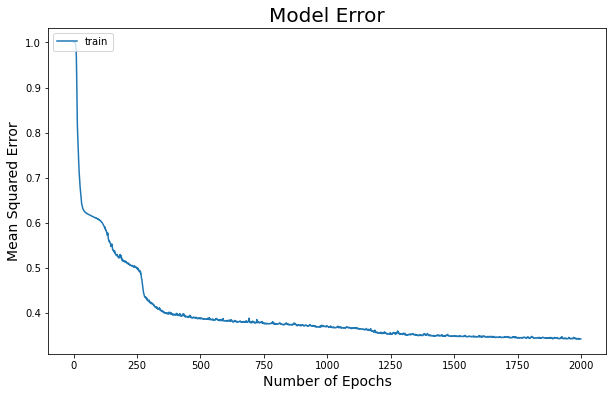

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model Error', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('Number of Epochs', fontsize=14)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [145]:
y_nn_pred = sc_y.inverse_transform(y_nn_pred_sc)

nn_predicted_proof_strength = np.transpose(y_nn_pred)[0]
nn_predicted_tensile_strength = np.transpose(y_nn_pred)[1]
nn_predicted_pct_elongation = np.transpose(y_nn_pred)[2]
nn_predicted_pct_reduction_area = np.transpose(y_nn_pred)[3]

In [146]:
actual_proof_strength = np.transpose(y_test)[0]
actual_tensile_strength = np.transpose(y_test)[1]
actual_pct_elongation = np.transpose(y_test)[2]
actual_pct_reduction_area = np.transpose(y_test)[3]

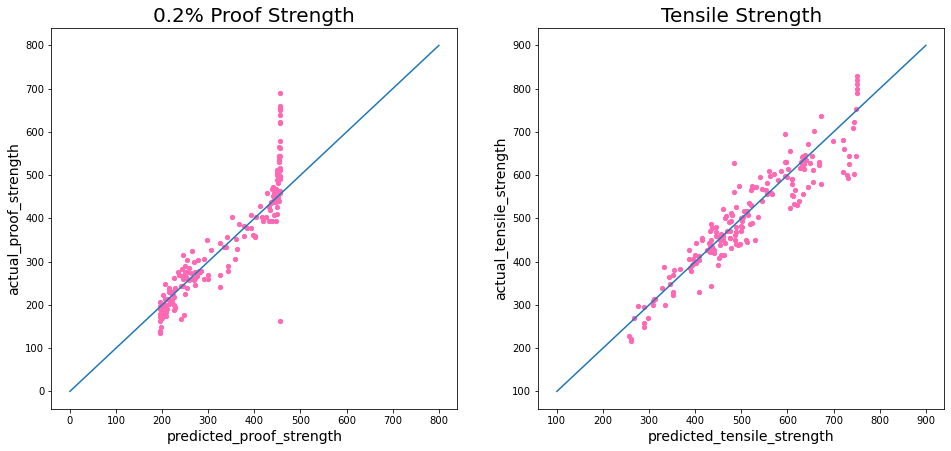

In [148]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,7))

ax0.scatter(nn_predicted_proof_strength, actual_proof_strength, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('0.2% Proof Strength', fontsize = 20)
ax0.set_xlabel('predicted_proof_strength', fontsize = 14)
ax0.set_ylabel('actual_proof_strength', fontsize = 14)

ax1.scatter(nn_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(100, 900, 1000)
y4 = x4
ax1.plot(x4, y4)
ax1.set_title('Tensile Strength', fontsize = 20)
ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

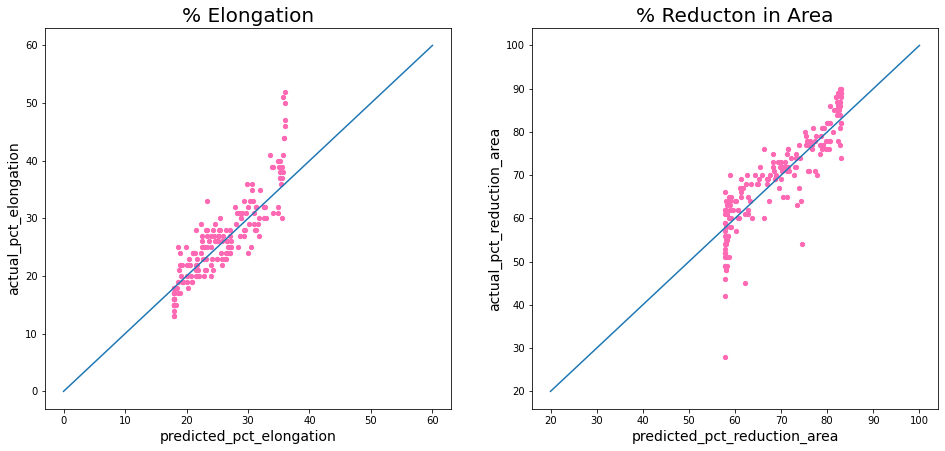

In [149]:
fig, (ax2,ax3) = plt.subplots(1,2,figsize=(16,7))

ax2.scatter(nn_predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 60, 1000)
y3 = x3
ax2.plot(x3, y3)
ax2.set_title('% Elongation', fontsize = 20)
ax2.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax2.set_ylabel('actual_pct_elongation', fontsize = 14)

ax3.scatter(nn_predicted_pct_reduction_area, actual_pct_reduction_area, color = 'hotpink', s=18)
x4 = np.linspace(20, 100, 1000)
y4 = x4
ax3.plot(x4, y4)
ax3.set_title('% Reducton in Area', fontsize = 20)
ax3.set_xlabel('predicted_pct_reduction_area', fontsize = 14)
ax3.set_ylabel('actual_pct_reduction_area', fontsize = 14)

plt.show()

In [147]:
# r2_score for each mechanical property
r2_proof_strength_nn = r2_score(actual_proof_strength, nn_predicted_proof_strength)
r2_tensile_strength_nn = r2_score(actual_tensile_strength, nn_predicted_tensile_strength)
r2_pct_elongation_nn = r2_score(actual_pct_elongation, nn_predicted_pct_elongation)
r2_pct_reduction_area_nn = r2_score(actual_pct_reduction_area, nn_predicted_pct_reduction_area)
print('R\u00b2_score for 0.2% Proof Strength = ' + str(round(r2_proof_strength_nn, 2)))
print('R\u00b2_score for Tensile strength    = ' + str(round(r2_tensile_strength_nn, 2)))
print('R\u00b2_score for % Elongation        = ' + str(round(r2_pct_elongation_nn, 2)))
print('R\u00b2_score for % Reduction in Area = ' + str(round(r2_pct_reduction_area_nn, 2)))

R²_score for 0.2% Proof Strength = 0.82
R²_score for Tensile strength    = 0.86
R²_score for % Elongation        = 0.77
R²_score for % Reduction in Area = 0.77
